SOFI GITA FIRNANDA
DICODING

In [ ]:
# Download and unzip the dataset
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip


Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

base_dir = '/content/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
# Define paths for the train and validation sets
train_path = '/content/rockpaperscissors/rps-cv-images'
val_path = '/content/rockpaperscissors/rps-cv-images'


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Inisialisasi model
model = Sequential()

# Tambahkan layer-layer ke dalam model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tentukan path ke direktori data
data_dir ='/content/rockpaperscissors/rps-cv-images'

# Tentukan parameter untuk ImageDataGenerator
batch_size = 32
img_height, img_width = 150, 150
validation_split = 0.4  # Ubah sesuai dengan persentase yang diinginkan

# Buat data generator untuk data latih
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split  # Menentukan persentase untuk data validasi
)

# Gunakan data generator untuk memuat dan membagi data latih
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Bagian ini menentukan bagian data latih
)

# Buat data generator untuk data validasi
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Bagian ini menentukan bagian data validasi
)

# Print informasi tentang jumlah data dalam setiap bagian
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes for training.")
print(f"Found {validation_generator.samples} images belonging to {validation_generator.num_classes} classes for validation.")


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Found 1314 images belonging to 3 classes for training.
Found 874 images belonging to 3 classes for validation.


In [ ]:
# Pelatihan model
history = model.fit(
    generator,
    steps_per_epoch=len(generator),
    epochs=25,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=2
)


Epoch 1/25
55/55 - 109s - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.1257 - val_accuracy: 0.9588 - 109s/epoch - 2s/step
Epoch 2/25
55/55 - 103s - loss: 0.0861 - accuracy: 0.9703 - val_loss: 0.0960 - val_accuracy: 0.9611 - 103s/epoch - 2s/step
Epoch 3/25
55/55 - 102s - loss: 0.0312 - accuracy: 0.9914 - val_loss: 0.0705 - val_accuracy: 0.9725 - 102s/epoch - 2s/step
Epoch 4/25
55/55 - 102s - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0603 - val_accuracy: 0.9748 - 102s/epoch - 2s/step
Epoch 5/25
55/55 - 103s - loss: 0.0319 - accuracy: 0.9886 - val_loss: 0.0886 - val_accuracy: 0.9634 - 103s/epoch - 2s/step
Epoch 6/25
55/55 - 102s - loss: 0.0301 - accuracy: 0.9920 - val_loss: 0.0652 - val_accuracy: 0.9840 - 102s/epoch - 2s/step
Epoch 7/25
55/55 - 106s - loss: 0.0240 - accuracy: 0.9943 - val_loss: 0.0742 - val_accuracy: 0.9703 - 106s/epoch - 2s/step
Epoch 8/25
55/55 - 101s - loss: 0.0312 - accuracy: 0.9909 - val_loss: 0.0825 - val_accuracy: 0.9657 - 101s/epoch - 2s/step
Epoch 9/25
55/55

In [ ]:
# Menampilkan persentase akurasi dan validasi
accuracy = history.history['accuracy'][-1] * 100  # Akurasi pada epoch terakhir
validation_accuracy = history.history['val_accuracy'][-1] * 100  # Akurasi validasi pada epoch terakhir

print(f'Akurasi: {accuracy:.2f}%')
print(f'Akurasi Validasi: {validation_accuracy:.2f}%')

Akurasi: 99.77%
Akurasi Validasi: 97.71%


Saving 2IOsxsG8AaxntdJM.png to 2IOsxsG8AaxntdJM.png


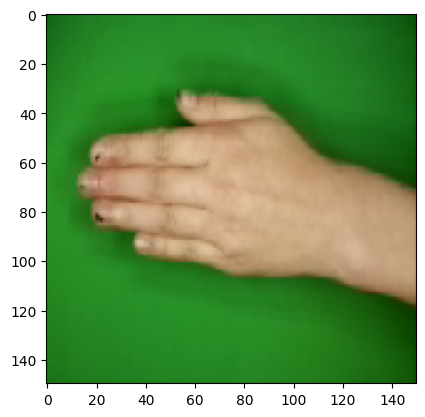

1/1 [==============================] - 0s 34ms/step
Predicted Class: Paper


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fungsi untuk memproses dan memprediksi gambar yang diunggah
def predict_uploaded_image(file_path):
    # Memuat gambar
    img = image.load_img(file_path, target_size=(150, 150))

    # Menampilkan gambar
    plt.imshow(img)
    plt.show()

    # Mengonversi gambar menjadi array
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Melakukan prediksi
    prediction = model.predict(img_array)
    class_labels = ['Paper', 'Rock', 'Scissors']

    # Mendapatkan label kelas yang diprediksi
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

# Mengunggah sebuah gambar
uploaded = files.upload()

# Memilih gambar yang diunggah untuk diprediksi
uploaded_image_path = list(uploaded.keys())[0]

# Melakukan prediksi
prediction_result = predict_uploaded_image(uploaded_image_path)
print(f"Predicted Class: {prediction_result}")
